# Face detection and recognition using OpenCV and Python

### This is a tutorial about face detection using Haar Cascade classifier and how to use it to recognize your own face

In [ ]:
'''
we will first start by loading a cascade model to detect a face in a webcam stream to make sure everything is 
well set and going fine

'''
import cv2

# Load HAAR face classifier
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_detector(img):
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5) # image, scaling factor, number of points to consider

    if faces is ():       #if there are no faces then return the original image and an empty list
        return img, []
    
    for (x,y,w,h) in faces:  #in presence of faces then return the image and region of the detect face
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi, (200, 200))
    return img, roi


# Open Webcam
cap = cv2.VideoCapture(0)


while True:
    ret, frame = cap.read()
    
    image, face = face_detector(frame)
    try:
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY) 
        
        cv2.putText(image, 'Face Found', (100, 120), cv2.FONT_HERSHEY_COMPLEX, 1, (255,120,150), 2)  
        cv2.imshow('Face Recognition', image )
    
    except:
        
        cv2.putText(image, "No Face Found", (220, 120) , cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
        
        cv2.imshow('Face Recognition', image )
        
        pass
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        
        break
        
cap.release()
cv2.destroyAllWindows()

Now we will create a dataset for your face. we shall you the webcam to take some shots of your face and save them to a directory which holds your name. You'll be asked to enter your first name

In [ ]:
import cv2
import numpy as np
import os

name=raw_input('Please, enter your first name : ')
directory='data/'+str(name)

if not os.path.exists(directory):
    os.makedirs(directory)


# Load HAAR face classifier
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load functions
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

# Initialize Webcam
cap = cv2.VideoCapture(0)
count = 0

# Collect 900 samples of your face from webcam input
while True:

    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (200, 200))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Save file in specified directory with unique name
        file_name_path = directory +'/'+ str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on images and display live count
        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
        
    else:
        print("Face not found")
        pass

    if cv2.waitKey(1) == 13 or count == 900: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

Notice that you can use the same script to make another dataset for any other faces of your friends or relatives as negative samples for your classifier or download a simple dataset like clatech 101 and extract it. You will find a folder contains around 400 faces it's called faces_easy you can use. here is a small script to download the dataset and extract the data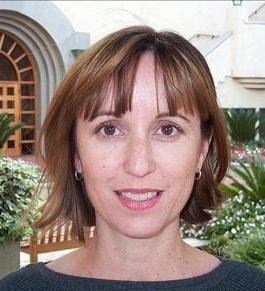

    The following cell contains three lines
    first one you import a library called subprocess which can be used to execute command lines
    the second line changes the privacy of the shell script file which can download the dataset
    the last one executes the file
   

In [ ]:
import subprocess
subprocess.call(["chmod", "+x", './download.sh']) # allow execution 
subprocess.call(['./download.sh']) #after a while depending on your connection speed it will be downloaded in the data directory

### Training

In [4]:
import cv2
import numpy as np 
import os

'''
in this cell you'll search the main directory 
and the subdirectories in alphabetical order to organize the images and its 
labels. Don't forget you have only two categories your face and any 
other face you add to the negative samples

'''
directory='data'

model = cv2.face.LBPHFaceRecognizer_create()

images, lables,  id = [], [],  0
names={}

for (subdirs, dirs, files) in sorted(os.walk(directory)):    
    for subdir in sorted(dirs):
        
        names['id'] = subdir
        subjectpath = os.path.join(directory, subdir)
        for filename in sorted(os.listdir(subjectpath)):
            
            path = subjectpath + '/' + filename
            lable = id
            images.append(cv2.imread(path, 0))
            lables.append(int(lable))
            
        id += 1
(images, labels) = [np.array(lis) for lis in [images, lables]]

model.train(images, lables)
model.save('trainer.yml')

SyntaxError: EOL while scanning string literal (<ipython-input-4-6e72f3df9963>, line 8)

### Testing


in this section you will load the trained model and try out your performance

In [3]:
import cv2
import numpy as np
import os
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer.yml')

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

webcam = cv2.VideoCapture(0)
while True:
    (_, im) = webcam.read()
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(im,(x,y),(x+w,y+h),(255,0,0),2)
        face = gray[y:y + h, x:x + w]
        face_resize = cv2.resize(face, (200,200))
         # Try to recognize the face
        prediction = recognizer.predict(face_resize)
        cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 3)
        if prediction[0] == 0:
            cv2.putText(im,'kareem',(x-10, y-10), cv2.FONT_HERSHEY_PLAIN,1,(0, 255, 0))
        else :
            cv2.putText(im,'not recognized',(x-10, y-10), cv2.FONT_HERSHEY_PLAIN,1,(0, 255, 0))
    cv2.imshow('OpenCV', im)
    if cv2.waitKey(1) == 13 : #13 is the Enter Key
        break
webcam.release()
cv2.destroyAllWindows()     

# Conclusion

After trying to test this implementation with new faces, the results were all false positives but it can recognize my face in different illumination conditions which is good.